# Introdução a Data Science
## Analisando as notas em geral dos filmes

In [1]:
# Carregando as bibliotecas 
import pandas as pd

In [2]:
# Lendo os dados e atribuindo a uma variável 
notas = pd.read_csv('dados/ml-latest-small/ratings.csv', sep=',')

In [3]:
# Visualizando as primeiras linhas dos dados
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
# Verificando a dimensão dos dados
notas.shape

(100836, 4)

In [5]:
 # Renomeado as colunas do dataframe
notas.columns = ['usuariosID', 'filmesID', 'notas', 'momentos']

In [6]:
notas.head()

,usuariosID,filmesID,notas,momentos
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [7]:
# Pegando os valores de uma coluna específica (Series)
notas['notas'].head()

0    4.0
1    4.0
2    4.0
3    5.0
4    5.0
Name: notas, dtype: float64

In [8]:
 # Visualizando os valores únicos
notas['notas'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [9]:
# Visualizando a frequência de cada valor
notas['notas'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: notas, dtype: int64

In [10]:
 # Calculando a média das notas
media = notas['notas'].mean()

# Calculando a mediana das notas
mediana = notas['notas'].median()

print('Média:', media)
print('Mediana:', mediana)

Média: 3.501556983616962
Mediana: 3.5


In [11]:
notas.notas.head()

0    4.0
1    4.0
2    4.0
3    5.0
4    5.0
Name: notas, dtype: float64

<AxesSubplot:>

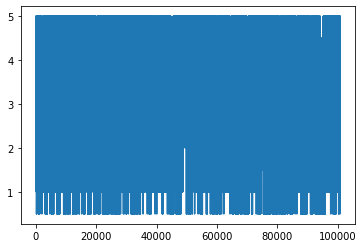

In [12]:
notas.notas.plot()

In [13]:
# !pip3 install matplotlib

<AxesSubplot:>

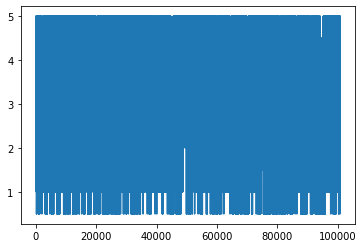

In [14]:
notas.notas.plot()

<AxesSubplot:>

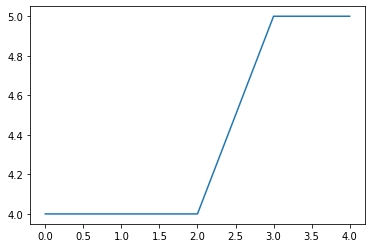

In [15]:
notas.notas.head().plot()

<AxesSubplot:ylabel='Frequency'>

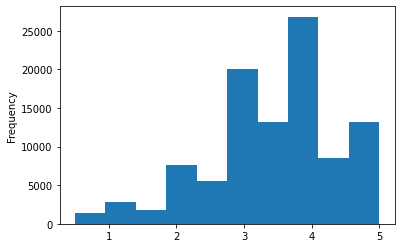

In [16]:
notas.notas.plot(kind='hist')

In [17]:
notas['notas'].describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: notas, dtype: float64

In [18]:
# !pip3 install seaborn

In [19]:
import seaborn as sns

<AxesSubplot:xlabel='notas'>

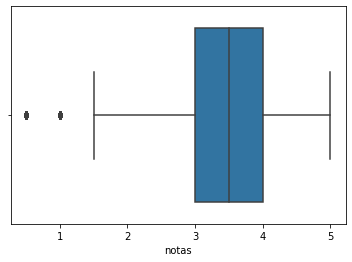

In [20]:
sns.boxplot(notas.notas)

## Olhando os filmes

In [21]:
movies = pd.read_csv("dados/ml-latest-small/movies.csv")

In [22]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [23]:
notas.head()

,usuariosID,filmesID,notas,momentos
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [26]:
movies.columns = ['filmesID', 'titulo', 'generos']
movies.head()

,filmesID,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [29]:
notas.head()

,usuariosID,filmesID,notas,momentos
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


## Analisando algumas notas específicas por filme

In [35]:
# Tirando a média das notas, cujo filme ID é igual a 1
notas.query('filmesID==1').notas.mean()

3.9209302325581397

In [36]:
# Tirando a média das notas, cujo filme ID é igual a 2
notas.query('filmesID==2').notas.mean()

3.4318181818181817

In [37]:
notas.groupby('filmesID')

In [40]:
notas_medias_por_filme = notas.groupby('filmesID').mean()['notas']

In [42]:
notas_medias_por_filme.head()

filmesID
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: notas, dtype: float64

<AxesSubplot:ylabel='Frequency'>

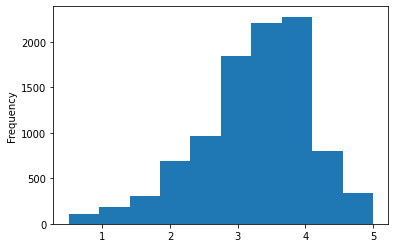

In [43]:
notas_medias_por_filme.plot(kind='hist')

In [50]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Histograma das notas médias dos filmes')

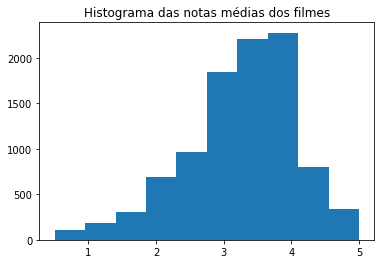

In [54]:
plt.hist(notas_medias_por_filme)
plt.title("Histograma das notas médias dos filmes")

<AxesSubplot:ylabel='notas'>

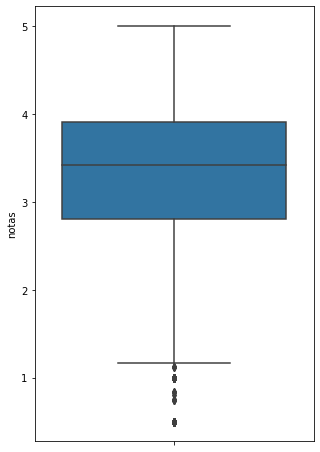

In [56]:
plt.figure(figsize=(5,8))

sns.boxplot(y=notas_medias_por_filme)

In [45]:
notas_medias_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: notas, dtype: float64

<AxesSubplot:xlabel='notas'>

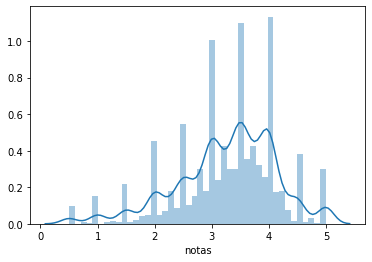

In [48]:
sns.distplot(notas_medias_por_filme)

<AxesSubplot:xlabel='notas'>

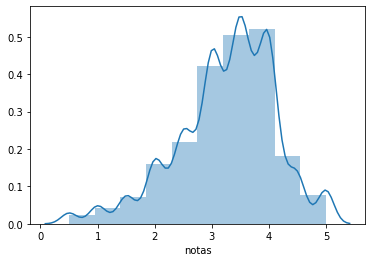

In [49]:
sns.distplot(notas_medias_por_filme, bins=10)